#### Load necessary libraries

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading data

In [23]:
data_path = '../Dataset/gse39582_n469_clinical_data.xlsx'

data_raw = pd.read_excel(data_path)

In [24]:
data_raw.head()

,Sample_ID,title,status,submission_date,last_update_date,organism,dataset,sex,age_at_diagnosis_in_years,tnm_stage,...,kras_mutation_exon_number,kras_mutation_protein,braf_mutation,braf_mutation_dna,braf_mutation_exon_number,braf_mutation_protein,cit_molecular_subtype,CMS,PDS_call,name
0,GSM971959,CIT003,Public on May 22 2013,Jul 23 2012,Jun 18 2021,Homo sapiens,discovery,Male,36.9,2,...,NaN,NaN,WT,NaN,NaN,NaN,C3,CMS3,PDS1,NaN
1,GSM971962,CIT006,Public on May 22 2013,Jul 23 2012,Jun 18 2021,Homo sapiens,discovery,Male,60.9,3,...,NaN,NaN,WT,NaN,NaN,NaN,C4,CMS4,PDS2,NaN
2,GSM971963,CIT007,Public on May 22 2013,Jul 23 2012,Jun 18 2021,Homo sapiens,discovery,Male,78.2,2,...,NaN,NaN,WT,NaN,NaN,NaN,C2,CMS1,PDS2,NaN
3,GSM971964,CIT008,Public on May 22 2013,Jul 23 2012,Jun 18 2021,Homo sapiens,discovery,Female,35.4,3,...,NaN,NaN,WT,NaN,NaN,NaN,C1,CMS2,PDS1,NaN
4,GSM971965,CIT009,Public on May 22 2013,Jul 23 2012,Jun 18 2021,Homo sapiens,discovery,Female,37.5,2,...,c.35G>A,p.G12D,WT,NaN,NaN,NaN,C1,UNK,PDS3,NaN


In [25]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sample_ID                   469 non-null    object 
 1   title                       469 non-null    object 
 2   status                      469 non-null    object 
 3   submission_date             469 non-null    object 
 4   last_update_date            469 non-null    object 
 5   organism                    469 non-null    object 
 6   dataset                     469 non-null    object 
 7   sex                         473 non-null    object 
 8   age_at_diagnosis_in_years   473 non-null    float64
 9   tnm_stage                   473 non-null    int64  
 10  tnm.t                       449 non-null    object 
 11  tnm.n                       449 non-null    object 
 12  tnm.m                       449 non-null    object 
 13  tumour_location             469 non

In [26]:
data = data_raw[['sex', 
                 'age_at_diagnosis_in_years', 
                 'tnm_stage', 
                 'chemotherapy_adjuvant', 
                 'chemotherapy_adjuvant_type',
                 'rfs_event',
                 'rfs_months',
                 'os_event',
                 'os_months',
                 'CMS',
                 'PDS_call']]

In [27]:
# Check empty or not
data.isnull().sum()

sex                             0
age_at_diagnosis_in_years       0
tnm_stage                       0
chemotherapy_adjuvant           2
chemotherapy_adjuvant_type    325
rfs_event                       8
rfs_months                      5
os_event                        7
os_months                       3
CMS                             0
PDS_call                        0
dtype: int64

In [28]:
# Describe the source dataset
data.describe(include='all')

,sex,age_at_diagnosis_in_years,tnm_stage,chemotherapy_adjuvant,chemotherapy_adjuvant_type,rfs_event,rfs_months,os_event,os_months,CMS,PDS_call
count,473,473.000000,473.000000,471,148,465.000000,468.000000,466.000000,470.000000,473,473
unique,2,NaN,NaN,3,5,NaN,NaN,NaN,NaN,5,4
top,Male,NaN,NaN,N,5FU,NaN,NaN,NaN,NaN,CMS2,PDS1
freq,265,NaN,NaN,264,80,NaN,NaN,NaN,NaN,161,154
mean,NaN,67.307400,2.433404,NaN,NaN,0.307527,52.615385,0.311159,60.370213,NaN,NaN
std,NaN,13.522875,0.496070,NaN,NaN,0.461967,40.271583,0.463465,38.775984,NaN,NaN
min,NaN,20.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,59.000000,2.000000,NaN,NaN,0.000000,19.000000,0.000000,32.000000,NaN,NaN
50%,NaN,69.000000,2.000000,NaN,NaN,0.000000,47.500000,0.000000,54.500000,NaN,NaN
75%,NaN,77.000000,3.000000,NaN,NaN,1.000000,77.000000,1.000000,82.000000,NaN,NaN


In [29]:
# Cleaning the dataset
data.dropna(subset=['chemotherapy_adjuvant', 'rfs_event', 'rfs_months', 'os_event', 'os_months'], inplace=True)

/var/folders/1_/vzcn0wp93dv8qshp0tmkb16c0000gn/T/ipykernel_51520/1727950543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['chemotherapy_adjuvant', 'rfs_event', 'rfs_months', 'os_event', 'os_months'], inplace=True)


In [30]:
data.isnull().sum()

sex                             0
age_at_diagnosis_in_years       0
tnm_stage                       0
chemotherapy_adjuvant           0
chemotherapy_adjuvant_type    317
rfs_event                       0
rfs_months                      0
os_event                        0
os_months                       0
CMS                             0
PDS_call                        0
dtype: int64

In [31]:
data['sex_numeric'] = data['sex'].map({'Male': 0, 'Female': 1})

# chemotherapy_adjuvant,'N'is 0，'Y'is 1
data['chemotherapy_adjuvant_numeric'] = data['chemotherapy_adjuvant'].map({'N': 0, 'Y': 1})

# new label for chemotherapy_adjuvant_type
chemo_type_mapping = {'N/A': 0, '5FU': 1, 'FOLFIRI': 2, 'FOLFOX': 3, 'FUFOL': 4, 'other': 5}
data['chemotherapy_adjuvant_type_numeric'] = data['chemotherapy_adjuvant_type'].map(chemo_type_mapping)
# NaN is 0, assuming that NaN represents no chemotherapy received
data['chemotherapy_adjuvant_type_numeric'] = data['chemotherapy_adjuvant_type_numeric'].fillna(0)

# new label for CMS
cms_mapping = {'CMS1': 1, 'CMS2': 2, 'CMS3': 3, 'CMS4': 4, 'UNK': 0}  # 假设UNK代表未知，赋值为0
data['CMS_numeric'] = data['CMS'].map(cms_mapping)

# new label for PDS_call
pds_call_mapping = {'PDS1': 1, 'PDS2': 2, 'PDS3': 3, 'Mixed': 4}
data['PDS_call_numeric'] = data['PDS_call'].map(pds_call_mapping)

# Delete the original column
data.drop(['sex', 'chemotherapy_adjuvant', 'chemotherapy_adjuvant_type', 'CMS', 'PDS_call'], axis=1, inplace=True)

print(data.head())

   age_at_diagnosis_in_years  tnm_stage  rfs_event  rfs_months  os_event  \
0                       36.9          2        1.0         4.0       0.0   
1                       60.9          3        0.0        73.0       0.0   
2                       78.2          2        1.0        17.0       1.0   
3                       35.4          3        0.0        35.0       0.0   
4                       37.5          2        0.0        33.0       0.0   

   os_months  sex_numeric  chemotherapy_adjuvant_numeric  \
0       52.0            0                              0   
1       73.0            0                              1   
2       20.0            0                              1   
3       35.0            1                              0   
4       33.0            1                              0   

   chemotherapy_adjuvant_type_numeric  CMS_numeric  PDS_call_numeric  
0                                 0.0            3                 1  
1                                 0.0   

/var/folders/1_/vzcn0wp93dv8qshp0tmkb16c0000gn/T/ipykernel_51520/877083688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex_numeric'] = data['sex'].map({'Male': 0, 'Female': 1})
/var/folders/1_/vzcn0wp93dv8qshp0tmkb16c0000gn/T/ipykernel_51520/877083688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['chemotherapy_adjuvant_numeric'] = data['chemotherapy_adjuvant'].map({'N': 0, 'Y': 1})
/var/folders/1_/vzcn0wp93dv8qshp0tmkb16c0000gn/T/ipykernel_51520/877083688.py:9: SettingWithCopyWarnin

In [32]:
data.isnull().sum()

age_at_diagnosis_in_years             0
tnm_stage                             0
rfs_event                             0
rfs_months                            0
os_event                              0
os_months                             0
sex_numeric                           0
chemotherapy_adjuvant_numeric         0
chemotherapy_adjuvant_type_numeric    0
CMS_numeric                           0
PDS_call_numeric                      0
dtype: int64

In [33]:
data['rfs_event'].value_counts()

rfs_event
0.0    321
1.0    139
Name: count, dtype: int64

<Axes: xlabel='rfs_event', ylabel='count'>

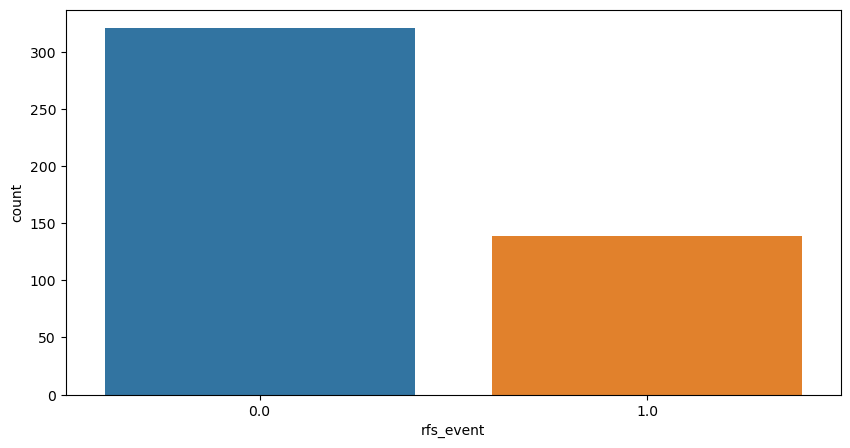

In [34]:
plt.figure(figsize=(10, 5))
sns.countplot(x='rfs_event', data=data)

### Constructed features

#### Treatment Response

In [35]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

In [44]:
y = data['rfs_event']
features = ['os_event', 'os_months', 'age_at_diagnosis_in_years', 'sex_numeric', 'tnm_stage', 'chemotherapy_adjuvant_numeric', 'chemotherapy_adjuvant_type_numeric', 'CMS_numeric']
X = data[features]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Feature standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc

def plot_confusion_Matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print(classification_report(y_test, y_pred))
    
def plot_ROC_Cure(y_test, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='AUC (area = {0:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Cure')
    plt.legend(loc="lower right")
    plt.show()

def print_evaluation(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    # Calculate the accuracy and ROC-AUC of the final model
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Output the final performance metrics
    print(f'Model Accuracy: {accuracy:.2f}')
    print(f'Model ROC-AUC: {roc_auc:.2f}')
    
    plot_confusion_Matrix(y_test, y_pred)
    plot_ROC_Cure(y_test, y_pred_prob)

### Different algorithms

#### 1. Random Forest

##### 1.1 Load necessary libraries

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

##### 1.2 Training models using the Random Forest algorithm

Model Accuracy: 0.84
Model ROC-AUC: 0.85


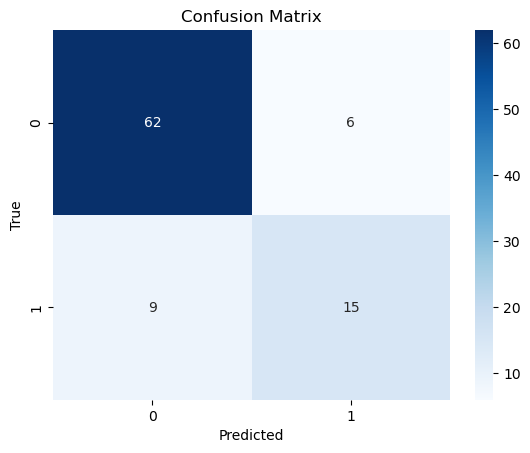

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89        68
         1.0       0.71      0.62      0.67        24

    accuracy                           0.84        92
   macro avg       0.79      0.77      0.78        92
weighted avg       0.83      0.84      0.83        92



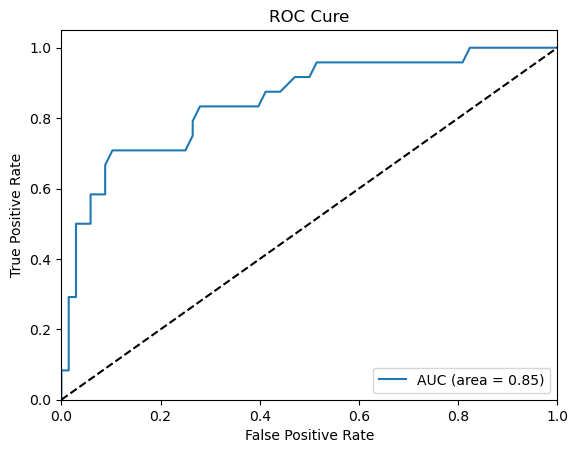

In [48]:
treat_RFmodel = RandomForestClassifier(n_estimators=100, random_state=42)
treat_RFmodel.fit(X_train, y_train)

print_evaluation(treat_RFmodel, X_test, y_test)

##### 1.3 Optimizing models using grid search

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=

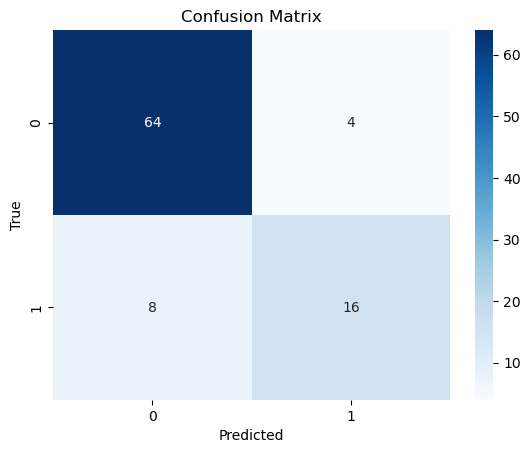

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91        68
         1.0       0.80      0.67      0.73        24

    accuracy                           0.87        92
   macro avg       0.84      0.80      0.82        92
weighted avg       0.87      0.87      0.87        92



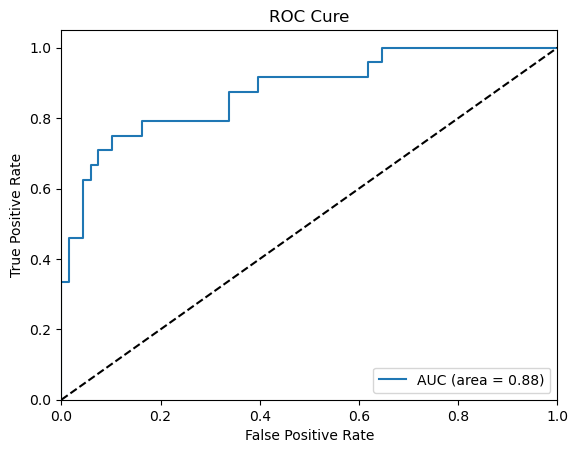

In [50]:
# Define the parameter space to be searched
RFparam_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

forest = RandomForestClassifier()
treat_RFgrid = GridSearchCV(forest, RFparam_grid, cv=5, scoring='roc_auc', n_jobs=1, verbose=2)
treat_RFgrid.fit(X_train, y_train)

# Print the best parameters and corresponding scores
print(f'Best parameters: {treat_RFgrid.best_params_}')
print(f'Best ROC-AUC score: {treat_RFgrid.best_score_}')

treat_RFbest_model = treat_RFgrid.best_estimator_

print_evaluation(treat_RFbest_model, X_test, y_test)

#### 2. SVM

##### 2.1 Load necessary libraries

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

##### 2.2 Training models using the SVM algorithm

Model Accuracy: 0.86
Model ROC-AUC: 0.86


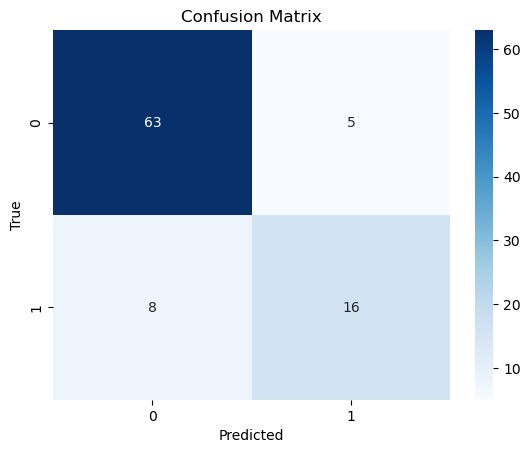

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91        68
         1.0       0.76      0.67      0.71        24

    accuracy                           0.86        92
   macro avg       0.82      0.80      0.81        92
weighted avg       0.85      0.86      0.86        92



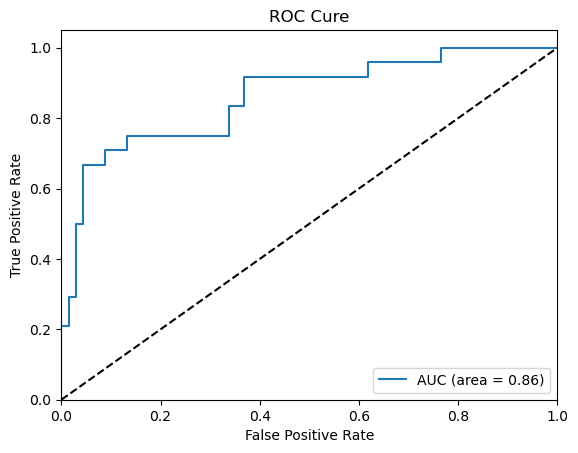

In [52]:
treat_SVMmodel = SVC(probability=True, random_state=42)  # 使用probability=True以便调用predict_proba
treat_SVMmodel.fit(X_train_scaled, y_train)

print_evaluation(treat_SVMmodel, X_test_scaled, y_test)

##### 2.3 Optimizing models using grid search

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale,

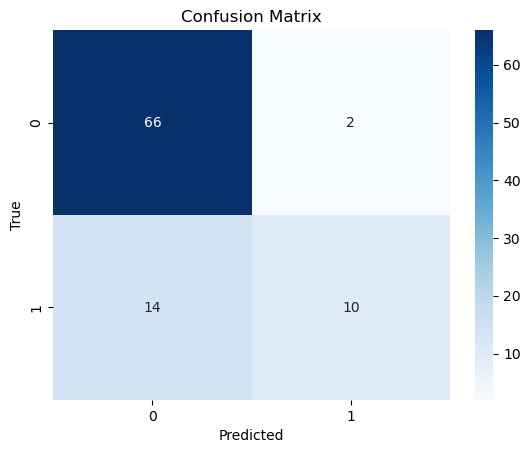

              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89        68
         1.0       0.83      0.42      0.56        24

    accuracy                           0.83        92
   macro avg       0.83      0.69      0.72        92
weighted avg       0.83      0.83      0.80        92



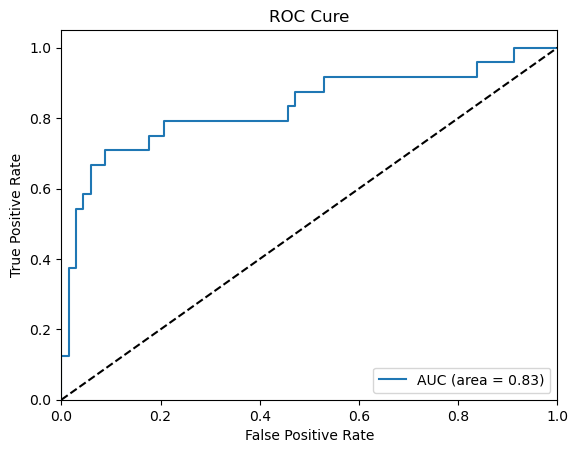

In [53]:
SVMparam_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto'],
}

SVM = SVC(probability=True, random_state=42)
treat_SVMgrid = GridSearchCV(SVM, SVMparam_grid, scoring='roc_auc', cv=5, verbose=2, n_jobs=1)
treat_SVMgrid.fit(X_train_scaled, y_train)

print(f'Best parameters: {treat_SVMgrid.best_params_}')
print(f'Best ROC-AUC score: {treat_SVMgrid.best_score_:.2f}')

treat_SVMbest_model = treat_SVMgrid.best_estimator_

print_evaluation(treat_SVMbest_model, X_test_scaled, y_test)

#### 3. KNN

##### 3.1 Load necessary libraries

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

##### 3.2 Training models using the KNN algorithm

Model Accuracy: 0.83
Model ROC-AUC: 0.83


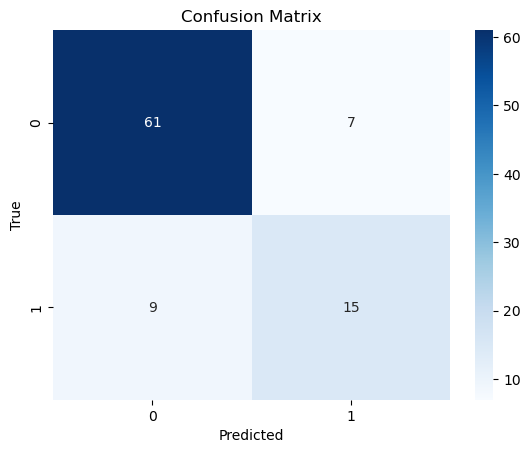

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88        68
         1.0       0.68      0.62      0.65        24

    accuracy                           0.83        92
   macro avg       0.78      0.76      0.77        92
weighted avg       0.82      0.83      0.82        92



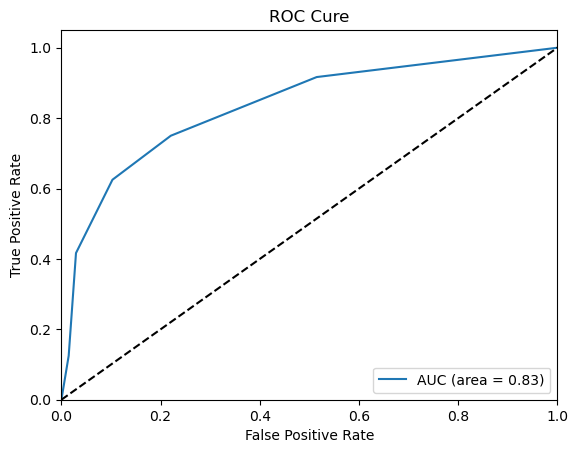

In [55]:
treat_KNNmodel = KNeighborsClassifier(n_neighbors=5)
treat_KNNmodel.fit(X_train_scaled, y_train)

print_evaluation(treat_KNNmodel, X_test_scaled, y_test)

##### 3.3 Optimizing models using grid search

Fitting 5 folds for each of 16 candidates, totalling 80 fits


Best parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best ROC-AUC score: 0.75
Model Accuracy: 0.86
Model ROC-AUC: 0.84


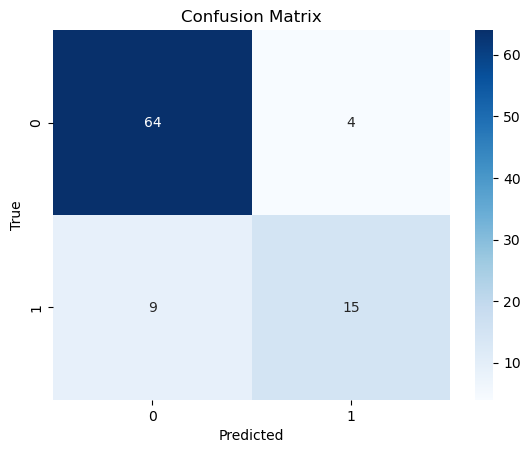

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91        68
         1.0       0.79      0.62      0.70        24

    accuracy                           0.86        92
   macro avg       0.83      0.78      0.80        92
weighted avg       0.85      0.86      0.85        92



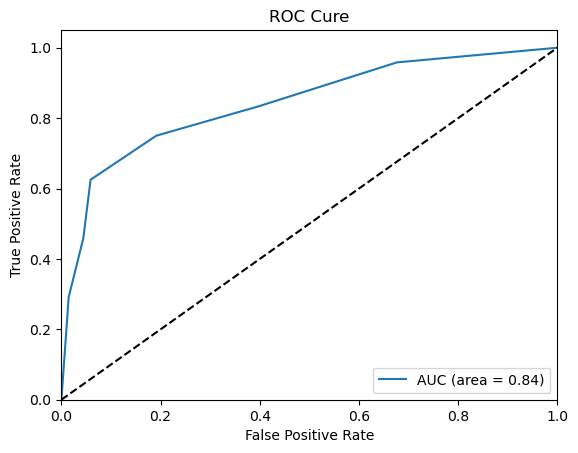

In [56]:
KNNparam_grid = {
    'n_neighbors': [3, 5, 7, 10], 
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

KNN = KNeighborsClassifier()
treat_KNNgrid = GridSearchCV(KNN, KNNparam_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
treat_KNNgrid.fit(X_train_scaled, y_train)

print(f'Best parameters: {treat_KNNgrid.best_params_}')
print(f'Best ROC-AUC score: {treat_KNNgrid.best_score_:.2f}')

treat_KNNbest_model = treat_KNNgrid.best_estimator_

print_evaluation(treat_KNNbest_model, X_test_scaled, y_test)

### Select a model to save

In [58]:
import joblib

model_path = '../web/app/models/treatment_model.pkl'

joblib.dump(treat_RFbest_model, model_path)

['../web/app/models/treatment_model.pkl']